In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pp

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import seaborn as sns

In [15]:
df = pd.read_csv('.\\simplifid_data.csv')
df.columns

Index(['Client', 'viable_candidate', 'Top_Value', 'Catagory_Label', 'Sale_MF',
       'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL', 'Sex',
       'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD',
       'Count_CC', 'Count_CL', 'Has_ActBal_CA', 'Has_ActBal_SA',
       'Has_ActBal_MF', 'Has_ActBal_OVD', 'Has_ActBal_CC', 'Has_ActBal_CL',
       'Has_VolumeCred', 'Has_VolumeCred_CA', 'Has_TransactionsCred',
       'Has_TransactionsCred_CA', 'Has_VolumeDeb', 'Has_VolumeDeb_CA',
       'Has_VolumeDebCash_Card', 'Has_VolumeDebCashless_Card',
       'Has_VolumeDeb_PaymentOrder', 'Has_TransactionsDeb',
       'Has_TransactionsDeb_CA', 'Has_TransactionsDebCash_Card',
       'Has_TransactionsDebCashless_Card', 'Has_TransactionsDeb_PaymentOrder',
       'VolumeCred_bin', 'binned_ActBal_CA', 'binned_VolumeCred',
       'binned_VolumeCred_CA', 'binned_TransactionsCred',
       'binned_TransactionsCred_CA', 'binned_VolumeDeb', 'binned_VolumeDeb_CA',
       'binned_Vo

In [ ]:
# I just wanted to check to see why tenure is the highest ranked feature
# To my suprise I see that the following plots show that the sheer number of 0 classes
# in both catagories make it very dificult to distinguish the two

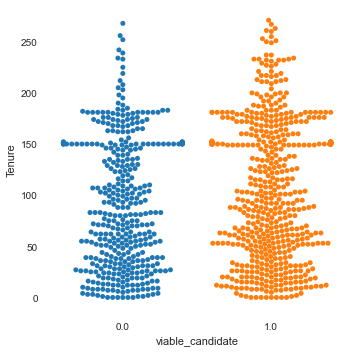

In [22]:
sns.catplot(x="viable_candidate", y="Tenure", kind="swarm",
 data=df);

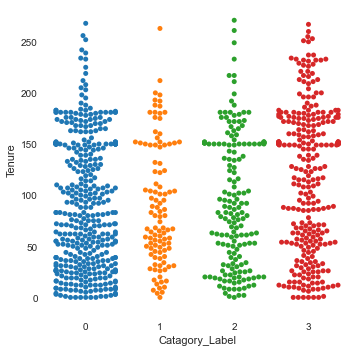

In [20]:
sns.catplot(x="Catagory_Label", kind="swarm", y="Tenure", data=df);

In [26]:
X = df.iloc[:, 10:]
y = df['viable_candidate']

In [27]:
# In light of this new evidence my resolve is stronger on my plan now
# Given that there isn't strong seperation what I'm going to do is predict if the person is viable of not with my binary 
# classifier then from that I will get a list of people who I believe belong to one of the 3 catagories
# I will then train my model on just those 3 labels

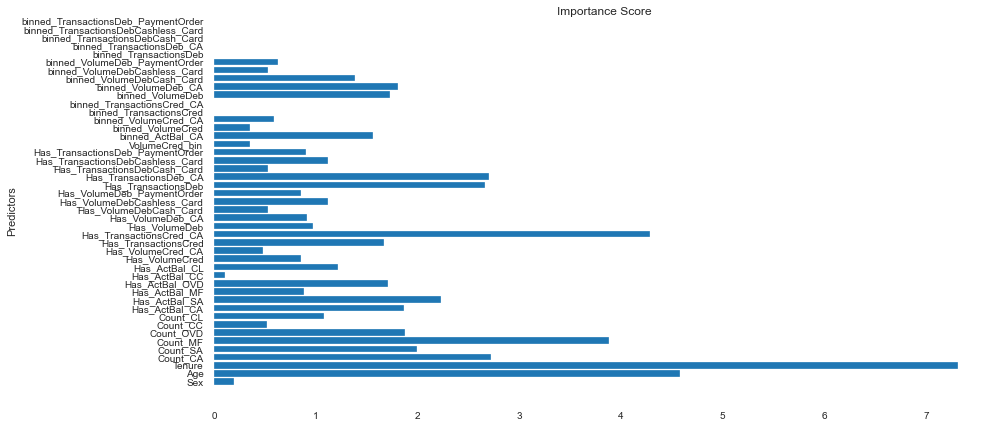

In [28]:

predictors = X.columns
# Perform feature selection where `k` (5 in this case) indicates the number of features we wish to select
selector = SelectKBest(f_classif, k=10)
selector.fit(X[predictors], y)
importance_score = -np.log(selector.pvalues_)

# Plot each column with their importance score
plt.rcParams["figure.figsize"] = [14,7]
plt.barh(range(len(predictors)), importance_score, color='C0')
plt.ylabel("Predictors")
plt.title("Importance Score")
plt.yticks(range(len(predictors)), predictors)

plt.show()